In [3]:
import tensorflow as tf
from tensorflow.keras import layers

In [6]:
import sys
print(sys.version)

3.11.0 (v3.11.0:deaf509e8f, Oct 24 2022, 14:43:23) [Clang 13.0.0 (clang-1300.0.29.30)]


In [12]:
from PIL import Image

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Found 56251 images belonging to 38 classes.
Found 3503 images belonging to 38 classes.
Epoch 1/25


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1758/1758 ━━━━━━━━━━━━━━━━━━━━ 80s 45ms/step - accuracy: 0.2336 - loss: 2.7671 - val_accuracy: 0.6660 - val_loss: 1.0958
Epoch 2/25
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 112s 64ms/step - accuracy: 0.5828 - loss: 1.3817 - val_accuracy: 0.7702 - val_loss: 0.7554
Epoch 3/25
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 87s 49ms/step - accuracy: 0.6764 - loss: 1.0431 - val_accuracy: 0.8070 - val_loss: 0.6431
Epoch 4/25
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 210s 119ms/step - accuracy: 0.7273 - loss: 0.8761 - val_accuracy: 0.8578 - val_loss: 0.4832
Epoch 5/25
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 89s 50ms/step - accuracy: 0.7650 - loss: 0.7497 - val_accuracy: 0.8561 - val_loss: 0.4738
Epoch 6/25
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 182s 103ms/step - accuracy: 0.7908 - loss: 0.6630 - val_accuracy: 0.8698 - val_loss: 0.4290
Epoch 7/25
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 153s 87ms/step - accuracy: 0.8065 - loss: 0.6157 - val_accuracy: 0.8715 - val_loss: 0.4280
Epoch 8/25
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 88s 50ms/step - accuracy: 0.8225 - loss

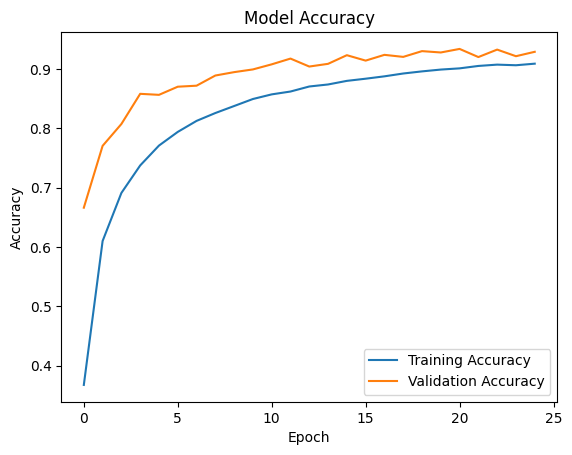

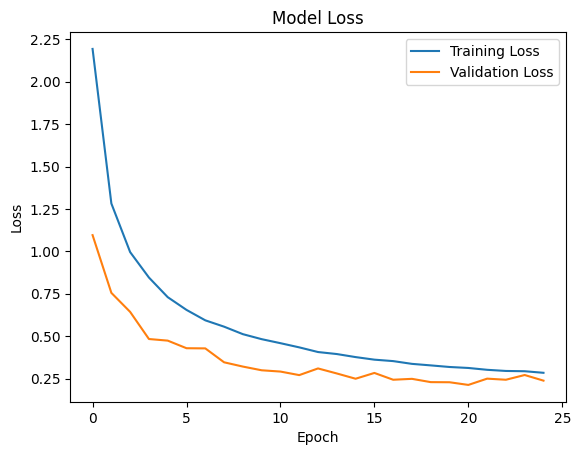

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# Step 1: Data Preprocessing

# ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,        # Normalize pixel values to [0, 1]
    shear_range=0.2,       # Shear for data augmentation
    zoom_range=0.2,        # Zoom for data augmentation
    horizontal_flip=True,  # Flip images horizontally
    validation_split=0.2   # Reserve 20% of data for validation
)

# Load training and validation data
train_set = train_datagen.flow_from_directory(
    '/Users/atharvasandipg_urao/Downloads/plant_disease_detection-main/archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',  # Path to training data
    target_size=(64, 64),     # Resize images to 64x64 pixels
    batch_size=32,
    class_mode='categorical', # For multi-class classification
    subset='training'
)

val_set = train_datagen.flow_from_directory(
    '/Users/atharvasandipgurao/Downloads/plant_disease_detection-main/archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',  # Path to validation data
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Step 2: Building the CNN model

model = Sequential()

# First convolutional layer
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening
model.add(Flatten())

# Fully connected layers
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(units=train_set.num_classes, activation='softmax'))  # Output layer for multi-class

# Step 3: Compiling the CNN
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Training the CNN model
history = model.fit(
    train_set,
    epochs=25,
    validation_data=val_set
)

# Step 5: Plot the accuracy and loss curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Save the model
model.save('plant_disease_model.h5')


In [8]:
!pip3 uninstall scipy


In [9]:
!pip3 install scipy

  Using cached scipy-1.14.1-cp311-cp311-macosx_14_0_arm64.whl (23.1 MB)

[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: pip3 install --upgrade pip


In [1]:
from torchvision import datasets

# Load your dataset
dataset = datasets.ImageFolder('/Users/atharvasandipgurao/Downloads/plant_disease_detection-main/archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train')  # Replace with your dataset path

# Print the class names
print("Classes:", dataset.classes)

# Print class indices
print("Class to Index Mapping:", dataset.class_to_idx)

Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___